**Context**


According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.


**Attribute Information**
1) id: unique identifier \
2) gender: "Male", "Female" or "Other" \
3) age: age of the patient \
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension \
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease \
6) ever_married: "No" or "Yes" \
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed" \
8) Residence_type: "Rural" or "Urban" \
9) avg_glucose_level: average glucose level in blood \
10) bmi: body mass index \
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"* \
12) stroke: 1 if the patient had a stroke or 0 if not 

**Note**: "Unknown" in smoking_status means that the information is unavailable for this patient

Acknowledgements
(Confidential Source) - Use only for educational purposes
If you use this dataset in your research, please credit the author.

### Import relevant packages and data

In [296]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [579]:
stroke_data = pd.read_csv('healthcare-dataset-stroke-data.csv')

### Confusion Matrix

In [963]:
## Confusion Matrix Code (Better visuals)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

### Data Exploration (Visual EDA)

In [298]:
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<AxesSubplot:xlabel='stroke', ylabel='count'>

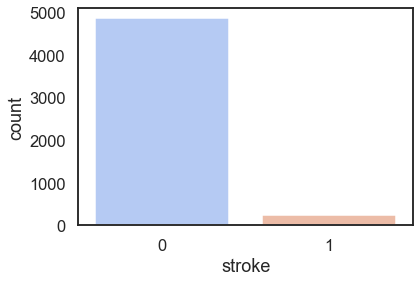

In [299]:
sns.set_context('talk')
sns.set_style('white')
sns.countplot(x='stroke', data=stroke_data, palette='coolwarm')

 Huge class imbalance and thus, oversampling techniques will be used later on since the dataset is relatively small (~5000 observations). This imples that accuracy is not a suitable metric to use as essentially a 95% accuracy for example could just mean that the model is giving an output of no stroke 95% of the time! 

The most important aspect is recall for the positive or minority class where the model has a low false negative (saying a patient has no stroke when infact he/she does). Regarding precision, it is alright for the model to have few false positives (a patient is said to have stroke when infact he/she does not).

In [300]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


7 numerical and 5 categorical columns with hypertension and heart disease having the same values (0 and 1) as our target stroke variable

In [920]:
stroke_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [302]:
stroke_data.describe(include=object)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [303]:
stroke_data['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [304]:
stroke_data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [305]:
stroke_data['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

Possible outliers include age being 0.08, glucose levels being low as 55 and as high as 271 (normal range = 90 - 140) and BMI levels equalling 10.3 possibly as ~13 appears to be fatal to survival although there have been females reported to have BMIs around 9-10. Maximum BMIs have been above 100 so the maximum value makes sense. In addition, there appears to be some null values of BMI and hence, we will replace those with the mean of the BMI column as we want to make use of the limited data we have as much as possible

The ages with such low values must be of children

In [306]:
stroke_data[stroke_data['age'] < 6].work_type.value_counts()

children    320
Name: work_type, dtype: int64

In [307]:
# Let us drop the id column as it is a useless feature
stroke_data.drop(columns='id', inplace=True)

<AxesSubplot:>

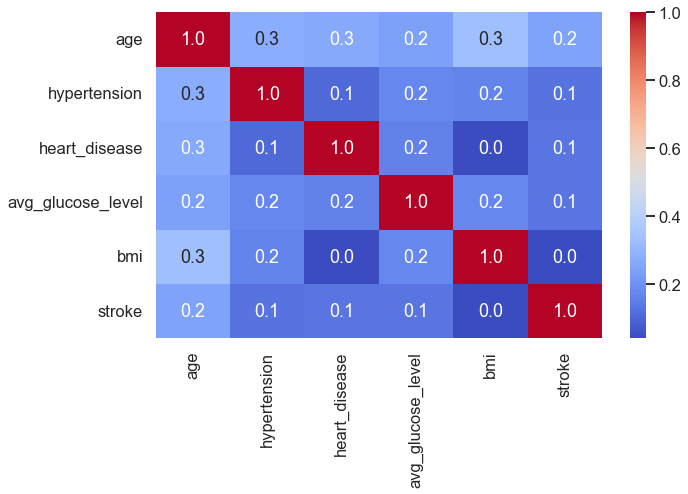

In [308]:
# We will see if there are correlations between variables
sns.set_context('talk')
sns.set_style('white')
corr = stroke_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt='.1f', cmap='coolwarm')

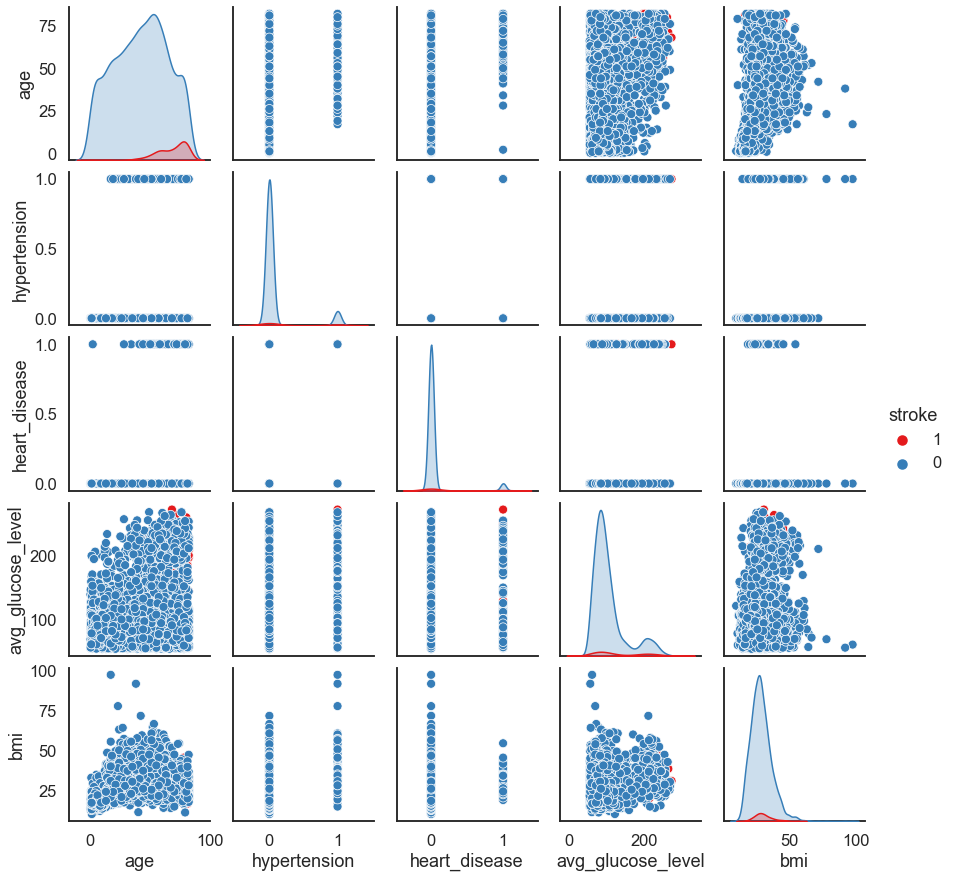

In [309]:
# Explore relationships between different variables
sns.set_context('talk')
sns.set_style('white')
sns.pairplot(stroke_data, hue='stroke', hue_order=[1, 0], palette='Set1')

Can notice that people with BMIs around 30, having heart disease, high average glucose levels and ages tend to have higher risk of having stroke

We will use further visualizations to confirm these observations

[Text(0.5, 0, 'Average Glucose Level')]

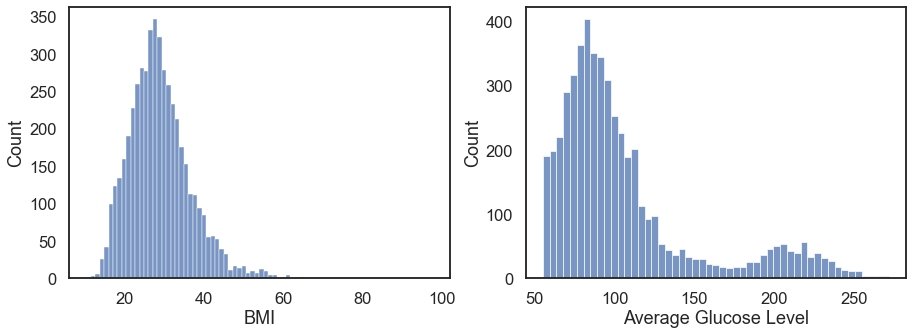

In [310]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(stroke_data['bmi'], ax=ax1)
ax1.set(xlabel='BMI')

sns.histplot(stroke_data['avg_glucose_level'], ax=ax2)
ax2.set(xlabel='Average Glucose Level')

In [873]:
stroke_data[(stroke_data['age'] > 70) & (stroke_data['stroke'] == 1)]['gender'].value_counts()

Female    74
Male      54
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='age'>

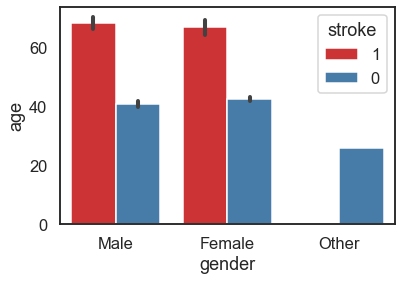

In [876]:
sns.barplot(x='gender', y='age', hue='stroke', data=stroke_data, palette='Set1', hue_order=[1, 0])

<AxesSubplot:xlabel='stroke', ylabel='age'>

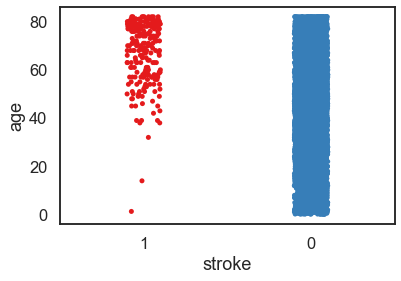

In [311]:
sns.stripplot(x='stroke', y='age', data=stroke_data, palette='Set1', order=[1, 0])

<AxesSubplot:xlabel='bmi', ylabel='Count'>

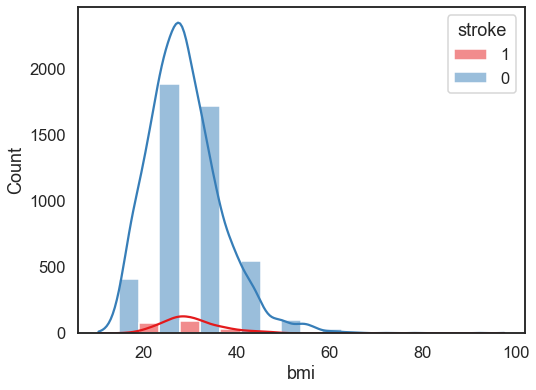

In [312]:
plt.figure(figsize=(8,6))
sns.histplot(x='bmi', hue='stroke', bins=10,hue_order=[1, 0], data=stroke_data, palette='Set1',
kde=True, multiple='dodge')

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

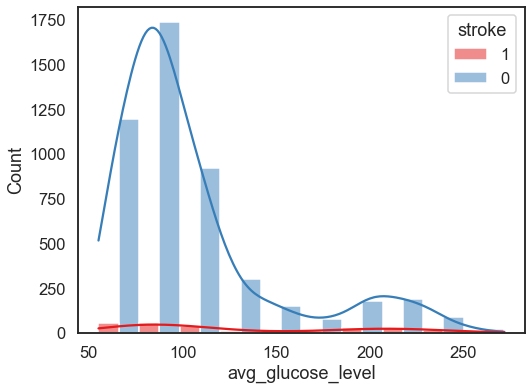

In [313]:
plt.figure(figsize=(8,6))
sns.histplot(x='avg_glucose_level', hue='stroke', bins=10,hue_order=[1, 0], data=stroke_data, palette='Set1',
kde=True, multiple='dodge')

In [314]:
categ_col = stroke_data.dtypes[stroke_data.dtypes == object].index

In [315]:
for index, column in zip(range(6), categ_col):
    print(column)

gender
ever_married
work_type
Residence_type
smoking_status


In [316]:
categ_col[1]

'ever_married'

In [317]:
axes

array([<AxesSubplot:title={'center':'gender Stripplot'}, xlabel='gender', ylabel='age'>,
       <AxesSubplot:title={'center':'ever_married Stripplot'}, xlabel='ever_married', ylabel='age'>,
       <AxesSubplot:title={'center':'work_type Stripplot'}, xlabel='work_type', ylabel='age'>,
       <AxesSubplot:title={'center':'Residence_type Stripplot'}, xlabel='Residence_type', ylabel='age'>,
       <AxesSubplot:title={'center':'smoking_status Stripplot'}, xlabel='smoking_status', ylabel='age'>,
       <AxesSubplot:>], dtype=object)

In [935]:
stroke_data['hypertension'] = stroke_data['hypertension'].map({0: 'No Hypertension', 1: 'Hypertension'})

In [937]:
stroke_data['heart_disease'] 

0       1
1       0
2       1
3       0
4       0
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: heart_disease, Length: 5110, dtype: int64

In [938]:
stroke_data['heart_disease'] = stroke_data['heart_disease'].map({0: 'No Heart Disease', 1: 'Heart Disease'})

In [948]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   object 
 4   heart_disease      5110 non-null   object 
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 479.2+ KB


In [940]:
categ_col = stroke_data.dtypes[stroke_data.dtypes == object].index

In [947]:
categ_col

Index(['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'Residence_type', 'smoking_status'],
      dtype='object')

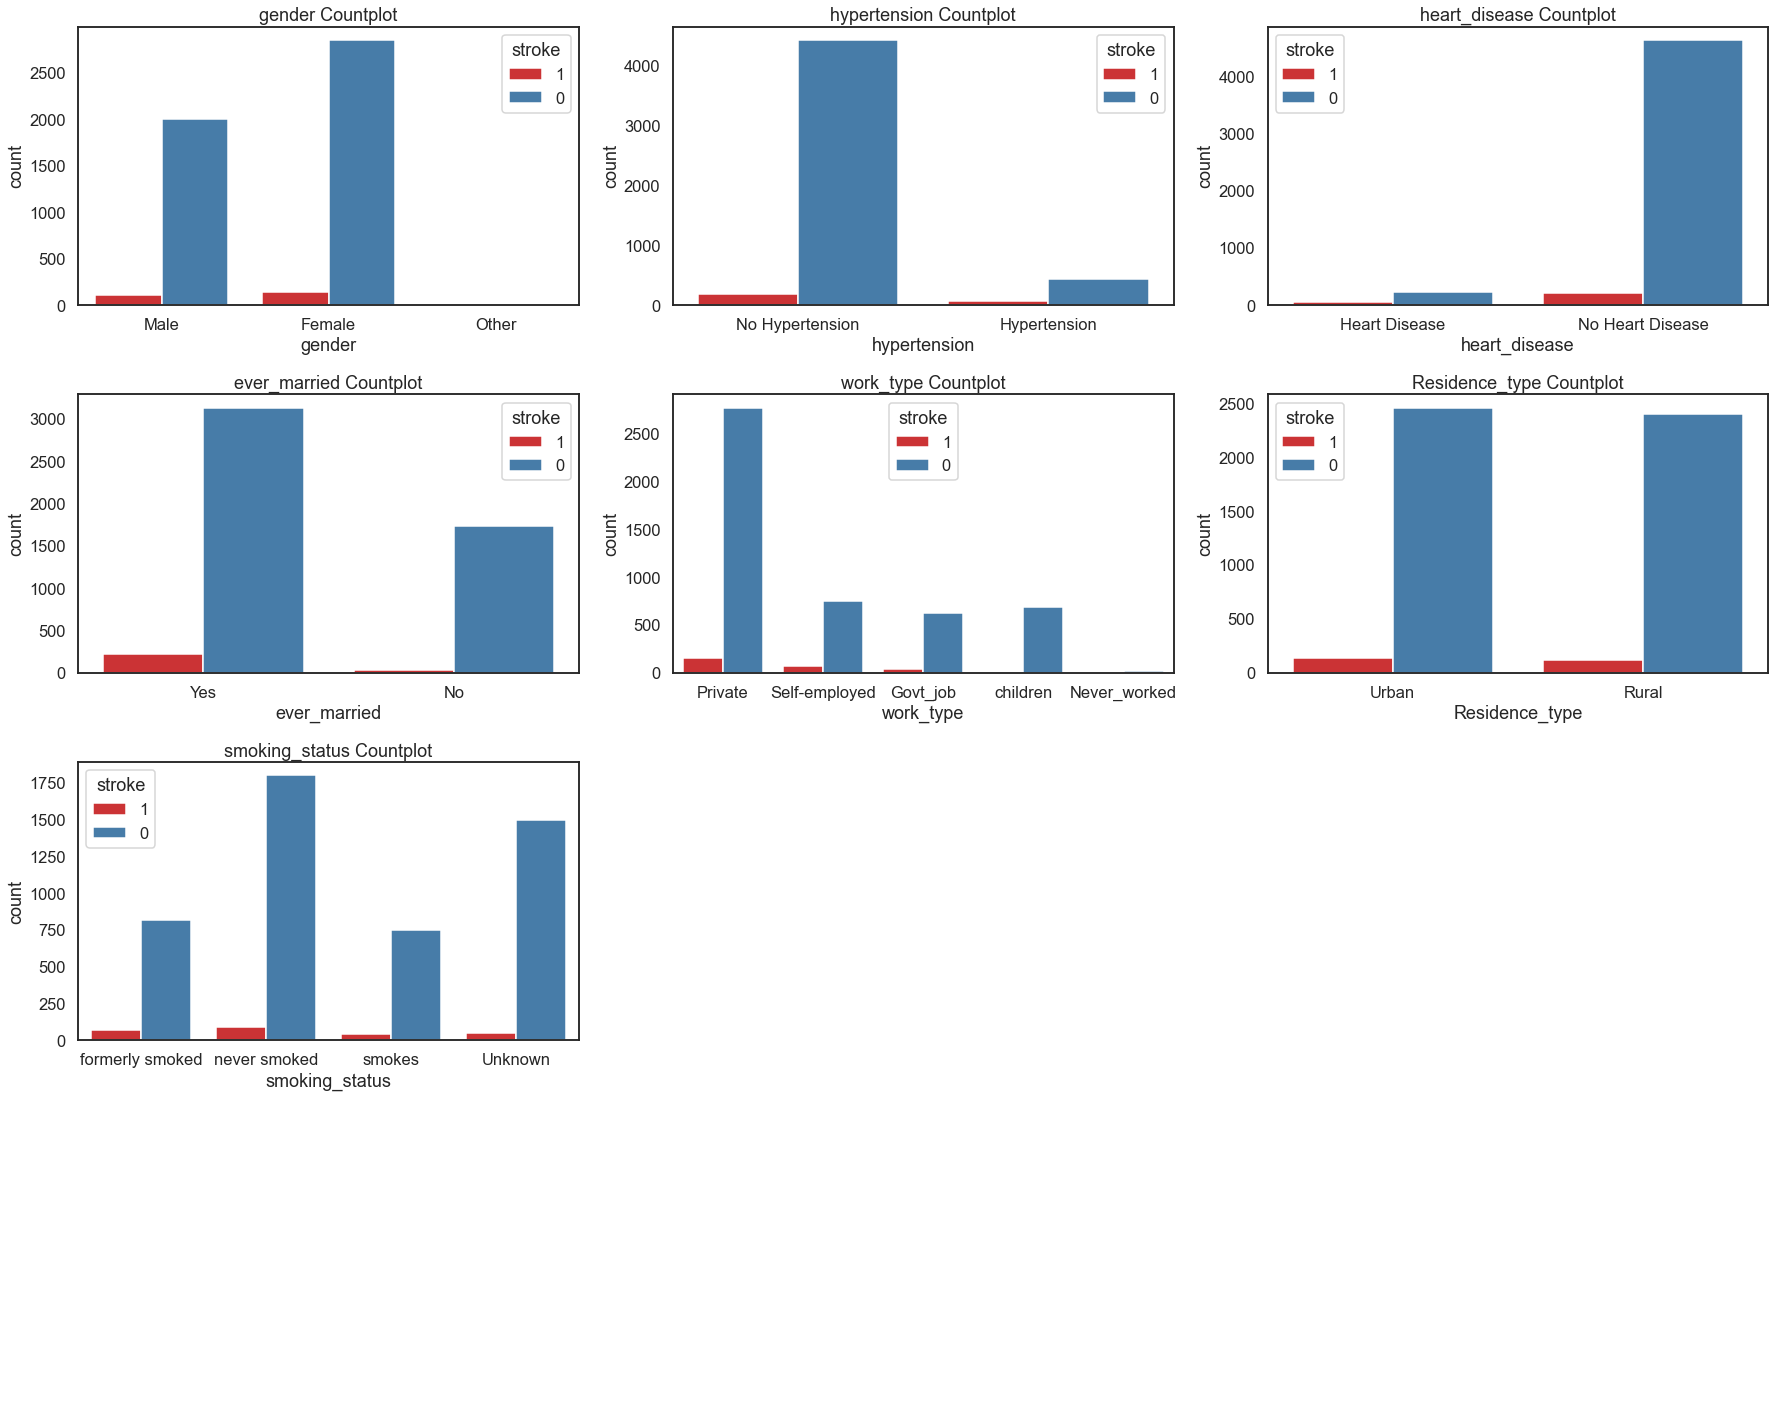

In [952]:
fig, axes = plt.subplots(4, 3, figsize=(25,20))
axes = axes.flatten()
axes[-1].axis('off')
axes[-2].axis('off')
axes[-3].axis('off')
axes[-4].axis('off')
axes[-5].axis('off')

for index, column in zip(range(7), categ_col):
    # Count plot
    sns.countplot(ax=axes[index], x=column, data=stroke_data, palette='Set1', hue='stroke', hue_order=[1, 0])
    axes[index].set_title(f'{column} Countplot')

    plt.tight_layout()

In [319]:
num_col = stroke_data.dtypes[stroke_data.dtypes == object].index

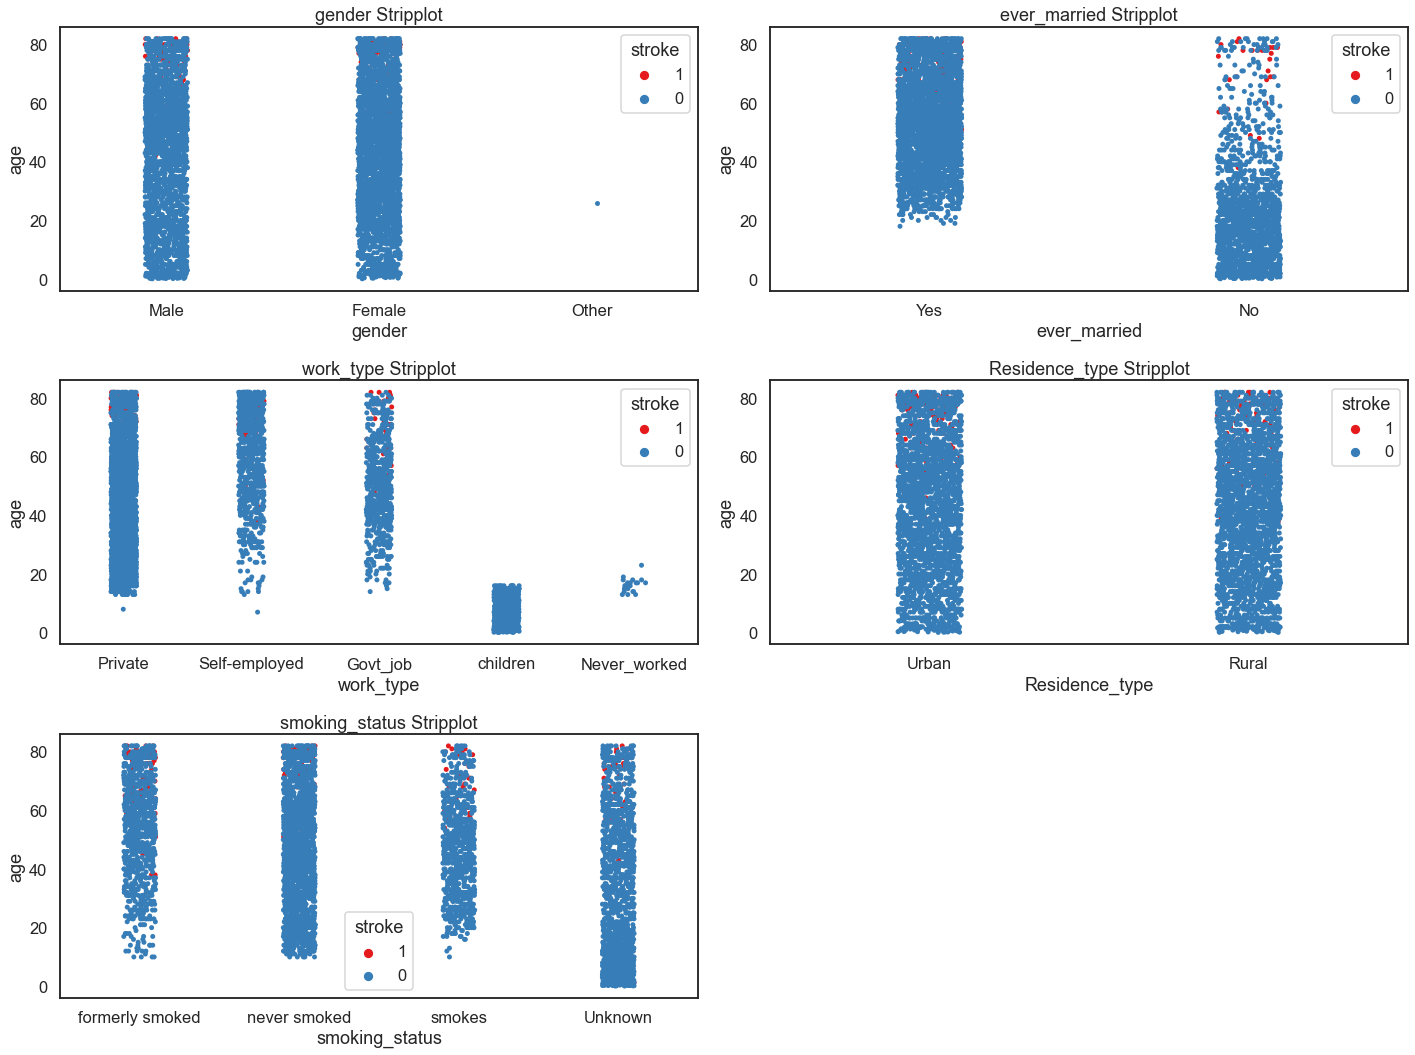

In [320]:
# For numerical columns - will plot different graphs of variables against target that check for outliers etc

fig, axes = plt.subplots(3, 2, figsize=(20,15))
axes = axes.flatten()
axes[-1].axis('off')
for index, column in zip(range(6), num_col):
    
    # Count plot
    sns.stripplot(ax=axes[index], x=column, y='age', data=stroke_data, palette='Set1', hue='stroke', hue_order=[1, 0])
    sns.move_legend(obj=axes[index], loc='best')
    axes[index].set_title(f'{column} Stripplot')

    plt.tight_layout()

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

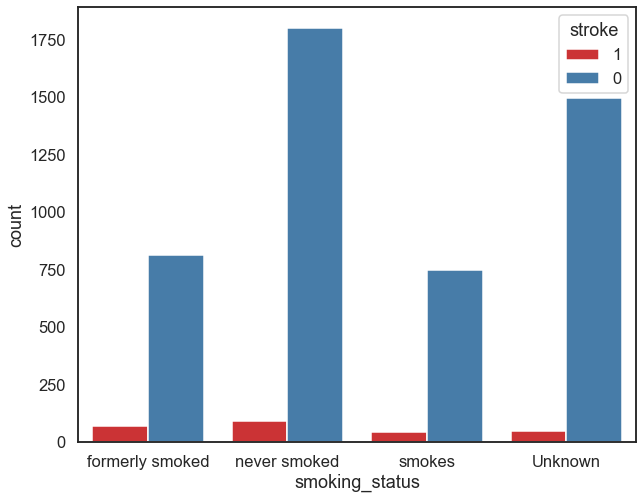

In [321]:
plt.figure(figsize=(10,8))
sns.countplot(x='smoking_status', data=stroke_data, hue='stroke', palette='Set1', hue_order=[1,0])

<AxesSubplot:xlabel='stroke', ylabel='avg_glucose_level'>

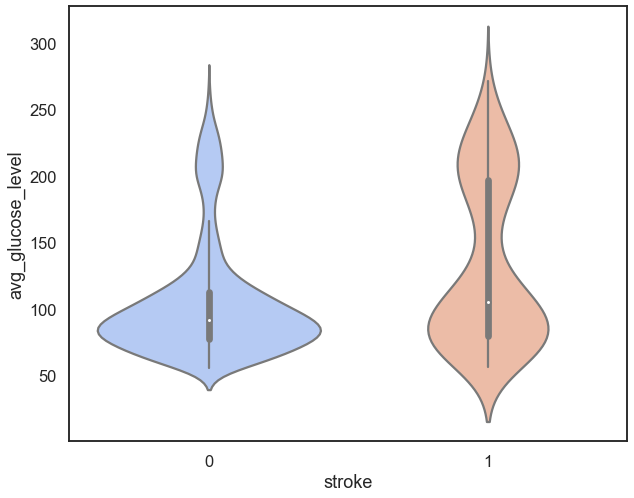

In [322]:
plt.figure(figsize=(10,8))
sns.violinplot(x='stroke', y='avg_glucose_level', data=stroke_data, palette='coolwarm')

More stroke cases around 60-80 and 180-230

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

Text(69.72819277108434, 300, 'Mean Age (Stroke): \n 67.73')

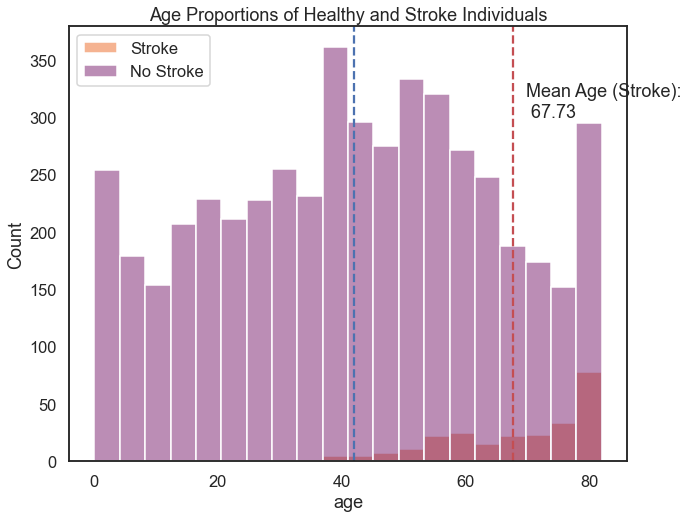

In [323]:
ax, fig = plt.subplots(1, 1, figsize=(10,8))
sns.histplot(data=stroke_data, x='age', hue='stroke', palette='inferno')
fig.set_title('Age Proportions of Healthy and Stroke Individuals')
fig.legend(loc='upper left', labels=['Stroke', 'No Stroke'])
fig.axvline(stroke_data[stroke_data['stroke'] == 1]['age'].mean(), linestyle='--', color='r')
fig.axvline(stroke_data[stroke_data['stroke'] == 0]['age'].mean(), linestyle='--')
fig.text(s=f"Mean Age (Stroke): \n {stroke_data[stroke_data['stroke'] == 1]['age'].mean():.2f}", 
        
        y = 300, x=stroke_data[stroke_data['stroke'] == 1]['age'].mean() + 2)

<AxesSubplot:xlabel='avg_glucose_level', ylabel='age'>

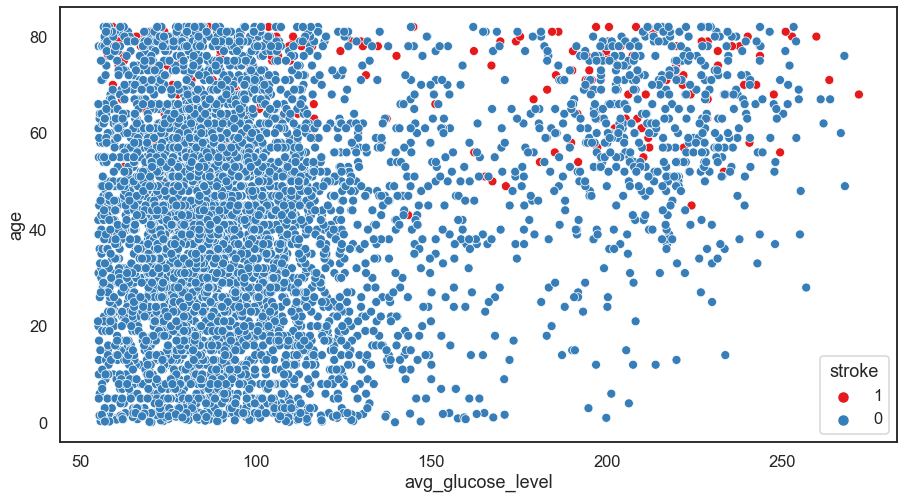

In [324]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='avg_glucose_level', y='age', data=stroke_data, hue='stroke', palette='Set1', hue_order=[1,0])

### Data preproccessing and cleaning

Remove outliers with z-score above 3 for bmi and glucose levels

In [340]:
stroke_data._get_numeric_data()[['bmi', 'avg_glucose_level']]

,bmi,avg_glucose_level
0,36.6,228.69
1,NaN,202.21
2,32.5,105.92
3,34.4,171.23
4,24.0,174.12
...,...,...
5105,NaN,83.75
5106,40.0,125.20
5107,30.6,82.99
5108,25.6,166.29


In [341]:
stroke_data.shape

(5110, 11)

In [342]:
df = stroke_data.copy()

In [343]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [344]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Split BMI data into 4 categories - slim, fit, overweight, obese

Split Avg Glucose Level into diabetic and non-diabetic 

In [345]:
# Replace all null values with the mean of BMI column
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [347]:
df['body_type'] = np.where(df['bmi'] < 18, 'slim', np.where(df['bmi'] < 25, 'fit', np.where(df['bmi'] < 30, 'overweight', 'obese')))

In [348]:
df['sugar_level'] = np.where(df['avg_glucose_level'] < 60, 'low', np.where(df['avg_glucose_level'] < 125, 'normal', 'diabetic'))

In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
 11  body_type          5110 non-null   object 
 12  sugar_level        5110 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 519.1+ KB


In [351]:
df['sugar_level'].value_counts()

normal      3890
diabetic    1000
low          220
Name: sugar_level, dtype: int64

In [352]:
df_2 = df.drop(['bmi', 'avg_glucose_level'], axis=1)

In [928]:
df_2.head()

,age,hypertension,heart_disease,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,body_type_obese,body_type_overweight,body_type_slim,sugar_level_low,sugar_level_normal
0,67.0,0,1,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0
1,61.0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
2,80.0,0,1,1,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1
3,49.0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0
4,79.0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0


In [354]:
df_2 = pd.get_dummies(df_2, drop_first=True)

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(x='body_type', hue='stroke', bins=10,hue_order=[1, 0], data=df , palette='Set1',
kde=True, multiple='dodge')

<AxesSubplot:xlabel='body_type', ylabel='Count'>

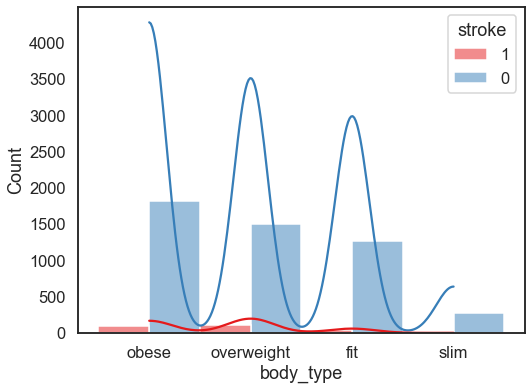

In [953]:
plt.figure(figsize=(8,6))
sns.histplot(x='body_type', hue='stroke', bins=10,hue_order=[1, 0], data=df , palette='Set1',
kde=True, multiple='dodge')

<AxesSubplot:xlabel='sugar_level', ylabel='Count'>

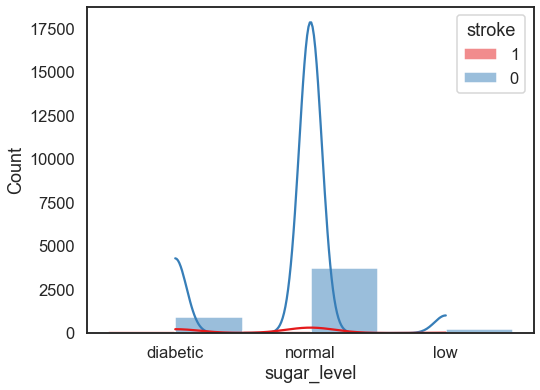

In [931]:
plt.figure(figsize=(8,6))
sns.histplot(x='sugar_level', hue='stroke', bins=10,hue_order=[1, 0], data=df , palette='Set1',
kde=True, multiple='dodge')

### Train and Test Split

In [355]:
from sklearn.model_selection import train_test_split
X = df_2.drop('stroke', axis=1)
y = df_2['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Oversampling

In [356]:
df_2['stroke'].value_counts(normalize=True)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

Less than 5 % of the data is positive for strokes and hence, model overfitting and not generalizing is a serious issue here

### SMOTE-Tomek Links

"Introduced first by Batista et al. (2003), this method combines the SMOTE ability to generate synthetic data for minority class and Tomek Links ability to remove the data that are identified as Tomek links from the majority class (that is, samples of data from the majority class that is closest with the minority class data). The process of SMOTE-Tomek Links is as follows.
(Start of SMOTE) Choose random data from the minority class.

Calculate the distance between the random data and its k nearest neighbors.
Multiply the difference with a random number between 0 and 1, then add the result to the minority class as a synthetic sample.
Repeat step number 2–3 until the desired proportion of minority class is met. (End of SMOTE)
(Start of Tomek Links) Choose random data from the majority class.
If the random data’s nearest neighbor is the data from the minority class (i.e. create the Tomek Link), then remove the Tomek Link.

To understand more about this method in practice, here I will give some example of how to implement SMOTE-Tomek Links in Python using imbalanced-learn library (or imblearn, in short)".

https://towardsdatascience.com/imbalanced-classification-in-python-smote-tomek-links-method-6e48dfe69bbc

In [368]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

In [369]:
oversampling = SMOTETomek(random_state=42)

In [370]:
X_train_smote, y_train_smote = oversampling.fit_resample(X_train, y_train)
X_test_smote, y_test_smote = oversampling.fit_resample(X_test, y_test)

In [371]:
X_train_smote.shape

(6814, 19)

<AxesSubplot:xlabel='stroke', ylabel='count'>

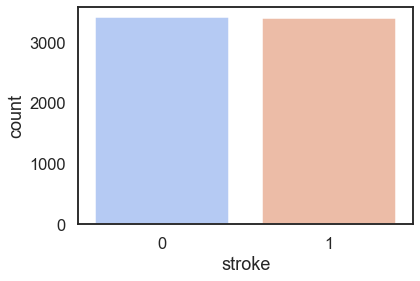

In [925]:
sns.set_context('talk')
sns.set_style('white')
sns.countplot(x=y_train_adasyn , palette='coolwarm')

### Adasyn

In [372]:
from imblearn.over_sampling import ADASYN

In [373]:
oversample = ADASYN(random_state=42)

In [374]:
X_train_adasyn, y_train_adasyn = oversample.fit_resample(X_train, y_train)
X_test_adasyn, y_test_adasyn = oversample.fit_resample(X_test, y_test)

In [377]:
X_train_adasyn.shape

(6829, 19)

In [378]:
X_train.shape

(3577, 19)

### Implementing various Machine Learning Models

In [358]:
# models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from xgboost import XGBClassifier

# metrics and pickle
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support, classification_report, confusion_matrix

In [379]:
import warnings
warnings.filterwarnings('ignore')

In [380]:
# First just use a random forest classifier to training and test sets that are not oversampled
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1444
           1       0.09      0.01      0.02        89

    accuracy                           0.94      1533
   macro avg       0.52      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533

[[1434   10]
 [  88    1]]


Terrible recall and precision for the positive/minority class. With high recall for class 0, that essentially means that the model is good at avoiding false negatives where the model predicts that a patient does have a stroke when in fact, he/she does not. This is of not much concern as pointed out earlier

We need to focus on the minority class

### Select best performing model based on recall of positive class (Has a stroke) 

In [974]:
model_dict = {
    
    'Logistic regression': LogisticRegression(solver='lbfgs', max_iter=400),
    'Naive Bayes': GaussianNB(), 
    'Stochastic Grad Descent': SGDClassifier(random_state=0), 
    'Random Forest Classifier': RandomForestClassifier(random_state=0, n_estimators=300, criterion='gini', max_depth=10),
    'Gradient Boosting Classifier': GradientBoostingClassifier(random_state=0),
    'Support Vector Machine': SVC(random_state=0),
    'K Nearest Classifier': KNeighborsClassifier(),
    'Decison Tree': DecisionTreeClassifier(random_state=0),
    'XGBoost': XGBClassifier(random_state=0, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=0.5)
    
}

We will pick the model and sampling approach with the highest recall and then perform hyperparameter optimization

### Experiment and select best sampling approach

In [383]:
from collections import Counter

#### SMOTE

In [394]:
model_list = []
test_acc_list = []
counter_list = []
metric_scores_list = []

In [395]:
for label, model in model_dict.items():
    model.fit(X_train_smote, y_train_smote)
    predictions = model.predict(X_test_smote)
    acc = accuracy_score(y_test_smote, predictions)
    report = precision_recall_fscore_support(y_test_smote, predictions, average='binary')
    report_values = ("precision = %0.2f, recall = %0.2f, F1 = %0.2f" % (report [0], report[1], report[2]))
    counter = Counter(predictions)
    print(model, 'Model')
    print(classification_report(y_test_smote, predictions))
    print(confusion_matrix(y_test_smote, predictions))
    print('----------------------------------------')
    
    model_list.append(label)
    test_acc_list.append(acc)
    counter_list.append(counter)
    metric_scores_list.append(report_values)
    
    
results = pd.DataFrame({'model': model_list, 'test_acc': test_acc_list, 'metric': metric_scores_list, 'counter': counter_list})

LogisticRegression(max_iter=400) Model
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1442
           1       0.85      0.82      0.84      1442

    accuracy                           0.84      2884
   macro avg       0.84      0.84      0.84      2884
weighted avg       0.84      0.84      0.84      2884

[[1241  201]
 [ 257 1185]]
----------------------------------------
GaussianNB() Model
              precision    recall  f1-score   support

           0       0.99      0.20      0.33      1442
           1       0.55      1.00      0.71      1442

    accuracy                           0.60      2884
   macro avg       0.77      0.60      0.52      2884
weighted avg       0.77      0.60      0.52      2884

[[ 283 1159]
 [   3 1439]]
----------------------------------------
SGDClassifier(random_state=0) Model
              precision    recall  f1-score   support

           0       0.73      0.87      0.79      1442
       

In [959]:
pd.reset_option('max_colwidth')
display(results)
Counter(y_test_smote)

,model,test_acc,metric,counter
0,LogisticRegression(max_iter=400),0.841379,"precision = 0.86, recall = 0.82, F1 = 0.84","{0: 1506, 1: 1394}"
1,GaussianNB(),0.598621,"precision = 0.56, recall = 1.00, F1 = 0.71","{1: 2614, 0: 286}"
2,SGDClassifier(random_state=0),0.794483,"precision = 0.77, recall = 0.85, F1 = 0.81","{0: 1296, 1: 1604}"
3,"(DecisionTreeClassifier(max_features='auto', r...",0.733793,"precision = 0.90, recall = 0.53, F1 = 0.66","{0: 2052, 1: 848}"
4,([DecisionTreeRegressor(criterion='friedman_ms...,0.834483,"precision = 0.88, recall = 0.77, F1 = 0.82","{0: 1622, 1: 1278}"
5,SVC(random_state=0),0.763793,"precision = 0.73, recall = 0.84, F1 = 0.78","{0: 1227, 1: 1673}"
6,KNeighborsClassifier(),0.768276,"precision = 0.83, recall = 0.68, F1 = 0.75","{0: 1702, 1: 1198}"
7,DecisionTreeClassifier(random_state=0),0.685862,"precision = 0.89, recall = 0.43, F1 = 0.58","{0: 2201, 1: 699}"
8,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.789655,"precision = 0.93, recall = 0.63, F1 = 0.75","{0: 1920, 1: 980}"


Counter({0: 1442, 1: 1442})

#### ADASYN

In [1426]:
model_list = []
test_acc_list = []
counter_list = []
metric_scores_list = []

LogisticRegression(max_iter=400) Model
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1444
           1       0.86      0.82      0.84      1456

    accuracy                           0.84      2900
   macro avg       0.84      0.84      0.84      2900
weighted avg       0.84      0.84      0.84      2900

----------------------------------------


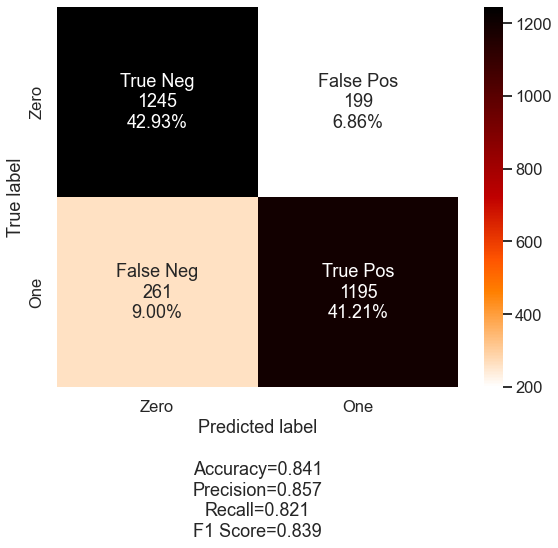

GaussianNB() Model
              precision    recall  f1-score   support

           0       0.99      0.20      0.33      1444
           1       0.56      1.00      0.71      1456

    accuracy                           0.60      2900
   macro avg       0.77      0.60      0.52      2900
weighted avg       0.77      0.60      0.52      2900

----------------------------------------


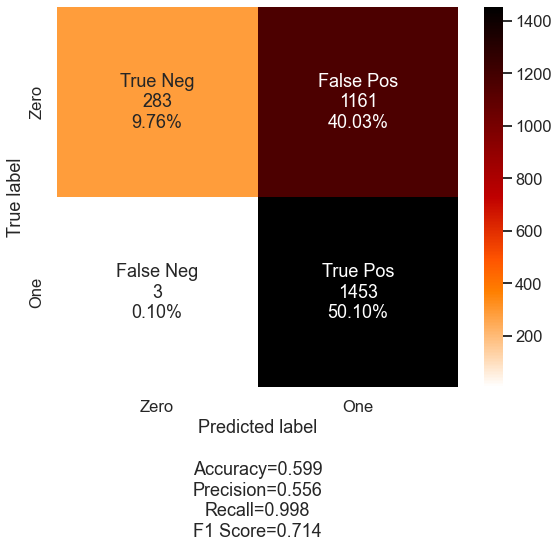

SGDClassifier(random_state=0) Model
              precision    recall  f1-score   support

           0       0.83      0.74      0.78      1444
           1       0.77      0.85      0.81      1456

    accuracy                           0.79      2900
   macro avg       0.80      0.79      0.79      2900
weighted avg       0.80      0.79      0.79      2900

----------------------------------------


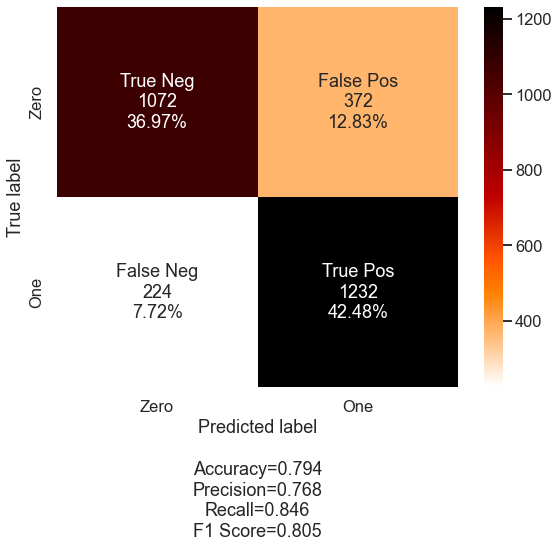

RandomForestClassifier(max_depth=10, n_estimators=300, random_state=0) Model
              precision    recall  f1-score   support

           0       0.76      0.91      0.83      1444
           1       0.89      0.71      0.79      1456

    accuracy                           0.81      2900
   macro avg       0.82      0.81      0.81      2900
weighted avg       0.82      0.81      0.81      2900

----------------------------------------


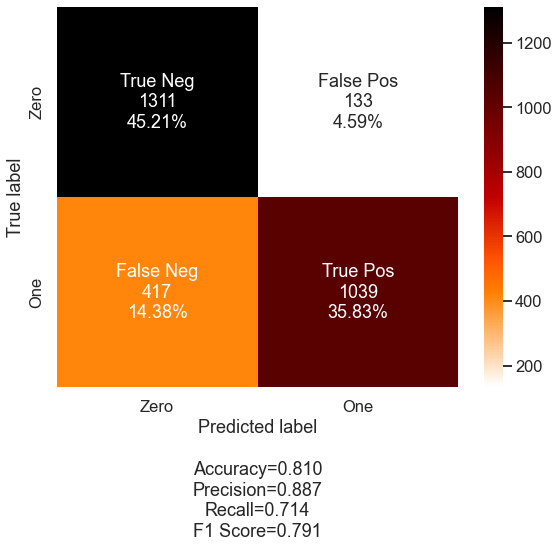

GradientBoostingClassifier(random_state=0) Model
              precision    recall  f1-score   support

           0       0.80      0.90      0.84      1444
           1       0.88      0.77      0.82      1456

    accuracy                           0.83      2900
   macro avg       0.84      0.83      0.83      2900
weighted avg       0.84      0.83      0.83      2900

----------------------------------------


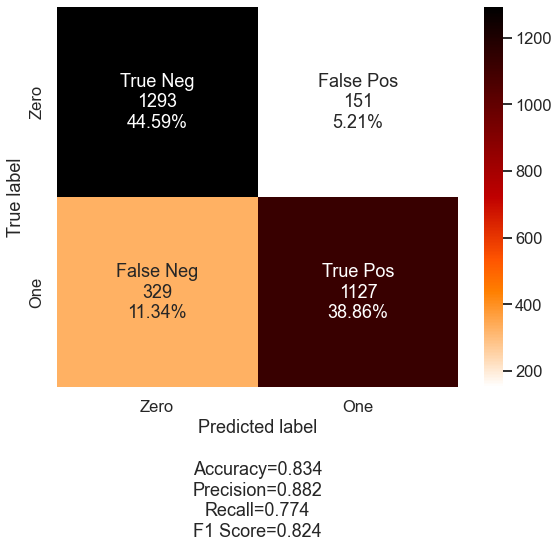

SVC(random_state=0) Model
              precision    recall  f1-score   support

           0       0.81      0.69      0.74      1444
           1       0.73      0.84      0.78      1456

    accuracy                           0.76      2900
   macro avg       0.77      0.76      0.76      2900
weighted avg       0.77      0.76      0.76      2900

----------------------------------------


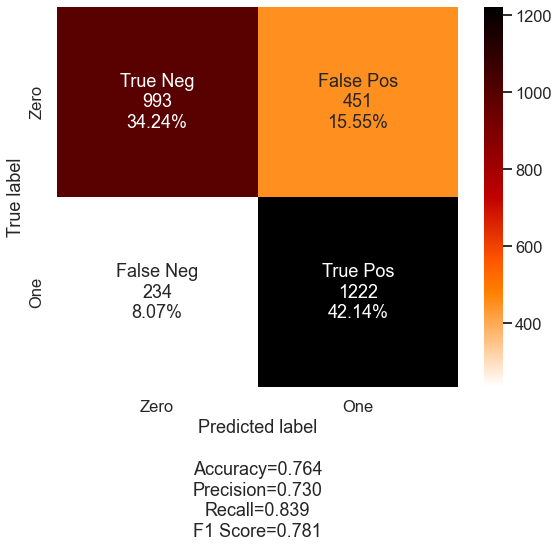

KNeighborsClassifier() Model
              precision    recall  f1-score   support

           0       0.73      0.86      0.79      1444
           1       0.83      0.68      0.75      1456

    accuracy                           0.77      2900
   macro avg       0.78      0.77      0.77      2900
weighted avg       0.78      0.77      0.77      2900

----------------------------------------


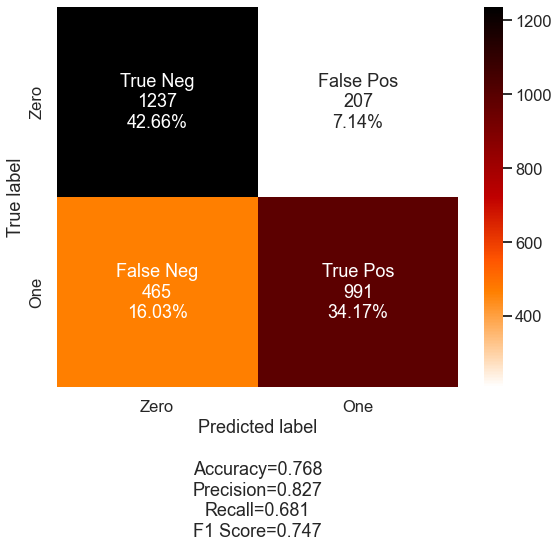

DecisionTreeClassifier(random_state=0) Model
              precision    recall  f1-score   support

           0       0.62      0.95      0.75      1444
           1       0.89      0.43      0.58      1456

    accuracy                           0.69      2900
   macro avg       0.76      0.69      0.66      2900
weighted avg       0.76      0.69      0.66      2900

----------------------------------------


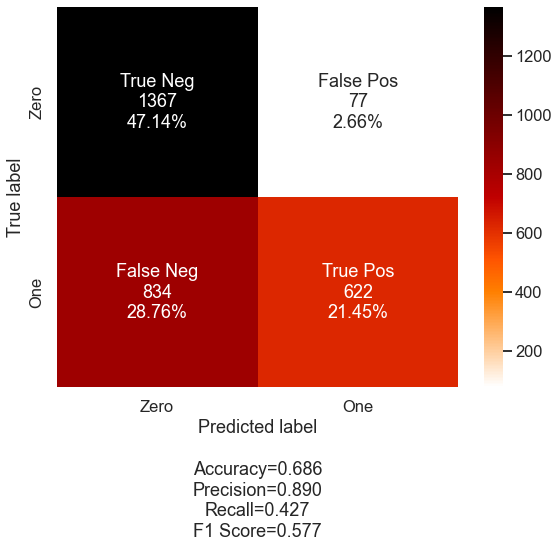

[02:02:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None) Model
              precision    recall  f1-score   suppo

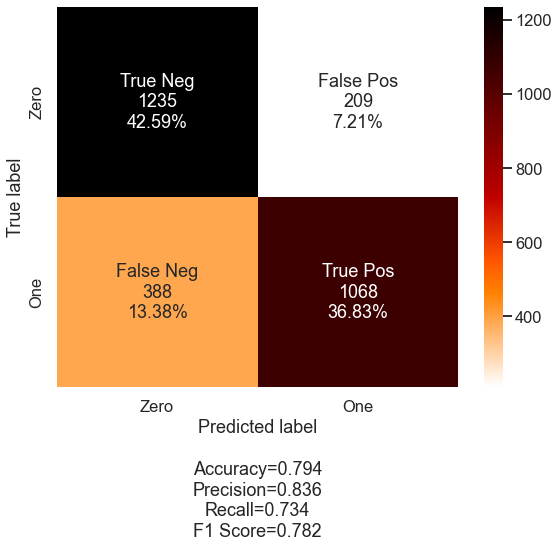

In [1427]:
for label, model in model_dict.items():
    model.fit(X_train_adasyn, y_train_adasyn)
    predictions = model.predict(X_test_adasyn)
    acc = accuracy_score(y_test_adasyn, predictions)
    report = precision_recall_fscore_support(y_test_adasyn, predictions, average='binary')
    report_values = ("precision = %0.2f, recall = %0.2f, F1 = %0.2f" % (report [0], report[1], report[2]))
    counter = Counter(predictions)
    print(model, 'Model')
    print(classification_report(y_test_adasyn, predictions))
    print('----------------------------------------')
    labels = ['True Neg','False Pos','False Neg','True Pos']
    categories = ['Zero', 'One']
    make_confusion_matrix(confusion_matrix(y_test_adasyn, predictions), 
                      group_names=labels,
                      categories=categories, 
                      cmap='gist_heat_r',
                      figsize=(9,7))
    plt.show()
    
    model_list.append(label)
    test_acc_list.append(acc)
    counter_list.append(counter)
    metric_scores_list.append(report_values)
    
    
results = pd.DataFrame({'model': model_list, 'test_acc': test_acc_list, 'metric': metric_scores_list, 'counter': counter_list})

In [1428]:
display(results)
Counter(y_test_adasyn)

,model,test_acc,metric,counter
0,Logistic regression,0.841379,"precision = 0.86, recall = 0.82, F1 = 0.84","{0: 1506, 1: 1394}"
1,Naive Bayes,0.598621,"precision = 0.56, recall = 1.00, F1 = 0.71","{1: 2614, 0: 286}"
2,Stochastic Grad Descent,0.794483,"precision = 0.77, recall = 0.85, F1 = 0.81","{0: 1296, 1: 1604}"
3,Random Forest Classifier,0.810345,"precision = 0.89, recall = 0.71, F1 = 0.79","{0: 1728, 1: 1172}"
4,Gradient Boosting Classifier,0.834483,"precision = 0.88, recall = 0.77, F1 = 0.82","{0: 1622, 1: 1278}"
5,Support Vector Machine,0.763793,"precision = 0.73, recall = 0.84, F1 = 0.78","{0: 1227, 1: 1673}"
6,K Nearest Classifier,0.768276,"precision = 0.83, recall = 0.68, F1 = 0.75","{0: 1702, 1: 1198}"
7,Decison Tree,0.685862,"precision = 0.89, recall = 0.43, F1 = 0.58","{0: 2201, 1: 699}"
8,XGBoost,0.794138,"precision = 0.84, recall = 0.73, F1 = 0.78","{0: 1623, 1: 1277}"


Counter({0: 1444, 1: 1456})

### Perform Grid Search or Hyperparamater Tuning on the best model

Let us optimizing the naive bayes model as it does produce 100% recall for the stroke: 1 class

In [1417]:
params_NB = {'var_smoothing': np.logspace(0,-12, num=300)}

In [494]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [570]:
from sklearn.metrics import make_scorer, fbeta_score, recall_score, f1_score
recall_score = make_scorer(f1_score, pos_label=1)

In [571]:
naive_bayes = GaussianNB()
gs_NB_smote = GridSearchCV(estimator=naive_bayes, param_grid=params_NB, cv=2,verbose=1,scoring=recall_score)
gs_NB_smote.fit(X_train_smote, y_train_smote)

Fitting 2 folds for each of 100 candidates, totalling 200 fits


GridSearchCV(cv=2, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring=make_scorer(f1_score, pos_label=1), verbose=1)

In [572]:
print(classification_report(y_test_smote, gs_NB_smote.predict(X_test_smote)))

              precision    recall  f1-score   support

           0       0.95      0.60      0.74      1442
           1       0.71      0.97      0.82      1442

    accuracy                           0.79      2884
   macro avg       0.83      0.79      0.78      2884
weighted avg       0.83      0.79      0.78      2884



In [573]:
print(confusion_matrix(y_test_smote, gs_NB.predict(X_test_smote)))

[[ 844  598]
 [  30 1412]]


In [1418]:
naive_bayes = GaussianNB()
gs_NB_adasyn = GridSearchCV(estimator=naive_bayes, param_grid=params_NB, cv=20,verbose=1,scoring=f2_score)
gs_NB_adasyn.fit(X_train_adasyn, y_train_adasyn)
print(classification_report(y_test_adasyn, gs_NB_adasyn.predict(X_test_adasyn)))

Fitting 20 folds for each of 300 candidates, totalling 6000 fits
              precision    recall  f1-score   support

           0       0.98      0.56      0.71      1444
           1       0.69      0.99      0.81      1456

    accuracy                           0.77      2900
   macro avg       0.83      0.77      0.76      2900
weighted avg       0.83      0.77      0.76      2900



In [1419]:
gs_NB_adasyn.best_estimator_

GaussianNB(var_smoothing=6.10876160750504e-05)

In [1420]:
gs_NB_adasyn.best_index_

105

In [1421]:
gs_NB_adasyn.best_score_

0.8949172458357602

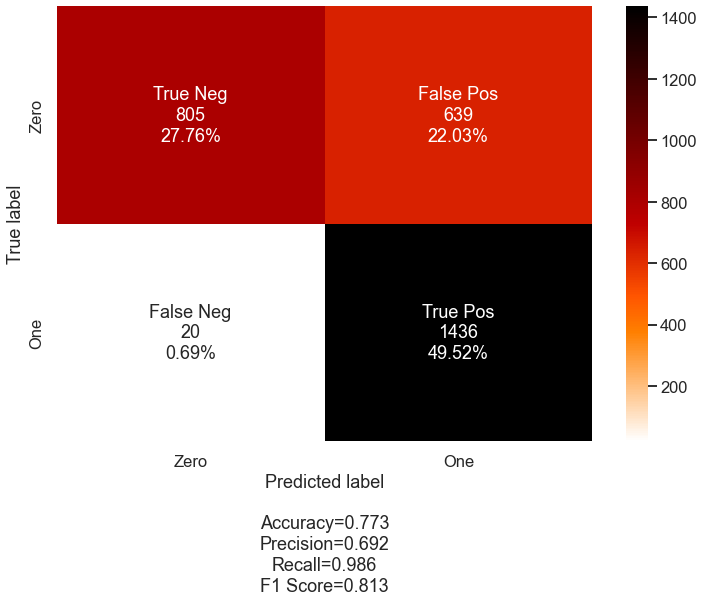

In [1422]:
cf_matrix = confusion_matrix(y_test_adasyn, gs_NB_adasyn.predict(X_test_adasyn))

# Print the matrix

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='gist_heat_r',
                      figsize=(12,8))
plt.show()

In [1423]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix

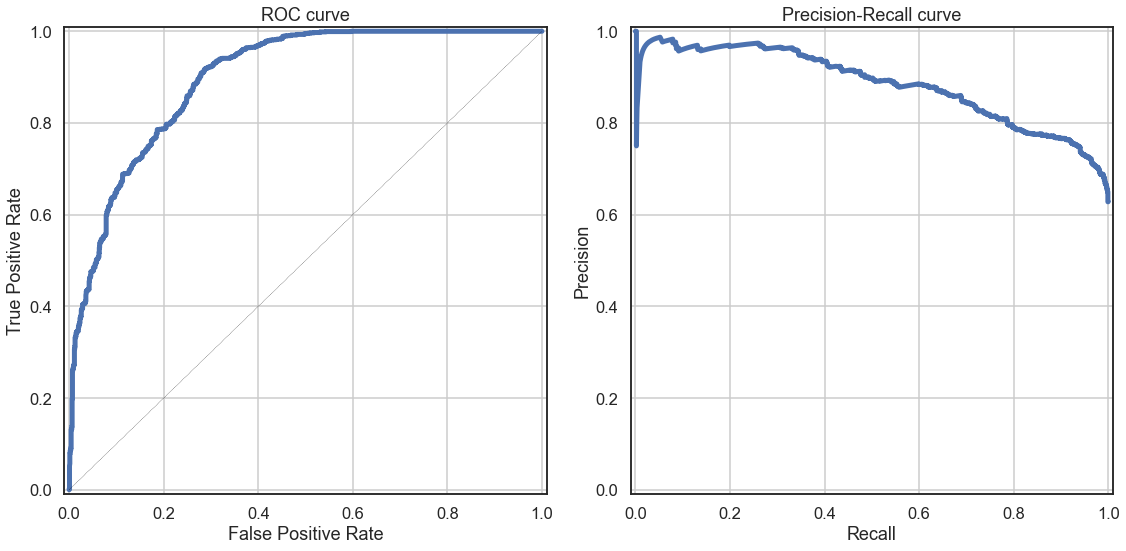

In [1424]:
sns.set_context('talk')

fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(16, 8)

# Get the probabilities for each of the two categories
y_prob = gs_NB.predict_proba(X_test_adasyn)

# Plot the ROC-AUC curve
ax = axList[0]

fpr, tpr, thresholds = roc_curve(y_test_adasyn, y_prob[:,1])
ax.plot(fpr, tpr, linewidth=5)
# It is customary to draw a diagonal dotted line in ROC plots.
# This is to indicate completely random prediction. Deviation from this
# dotted line towards the upper left corner signifies the power of the model.
ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='ROC curve')
ax.grid(True)

# Plot the precision-recall curve
ax = axList[1]

precision, recall, _ = precision_recall_curve(y_test_adasyn, y_prob[:,1])
ax.plot(recall, precision, linewidth=5)
ax.set(xlabel='Recall', ylabel='Precision',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Precision-Recall curve')
ax.grid(True)

plt.tight_layout()

This is what we need but for experimentation, let us try logistic regression, SVC, Bagging, and stochastic gradient descent for the adasyn sampling

A false negative is more serious as a disease has been ignored, which can lead to the death of the patient. At the same time, a false positive would lead to an unnecessary treatment — incurring additional cost.

Let’s try to minimize the false negatives by using Grid Search to find the optimal parameters. Grid search can be used to improve any specific evaluation metric.

### Decision Tree Classifier

In [1071]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [1, 3, 5, 7, 9],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 3, 4, 5, 7],
     'min_samples_split': [1, 2, 3, 5, 7, 9]}

In [1075]:
tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, parameters, cv=5, verbose=1, scoring='recall')
tree_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, 7, 9],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 4, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7, 9],
                         'splitter': ['best', 'random']},
             scoring='recall', verbose=1)

In [1076]:
print(classification_report(y_test_adasyn, tree_cv.predict(X_test_adasyn)))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50      1444
           1       0.60      1.00      0.75      1456

    accuracy                           0.67      2900
   macro avg       0.80      0.67      0.62      2900
weighted avg       0.80      0.67      0.62      2900



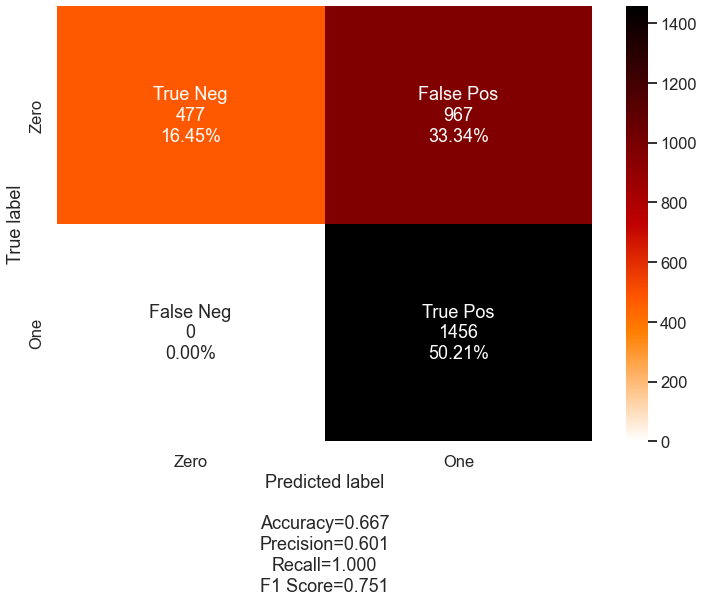

In [1077]:
cf_matrix = confusion_matrix(y_test_adasyn, tree_cv.predict(X_test_adasyn))

# Print the matrix

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='gist_heat_r',
                      figsize=(12,8))
plt.show()

### Logistic Regression

In [1085]:
clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2', 'none'],'C':[0.001,0.05, .009,0.01,.09,1,5,3, 7, 100,10,25, 30]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, cv=15, verbose=1, scoring = 'recall')
grid_clf_acc.fit(X_train_adasyn, y_train_adasyn)

Fitting 15 folds for each of 39 candidates, totalling 585 fits


GridSearchCV(cv=15, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.05, 0.009, 0.01, 0.09, 1, 5, 3, 7, 100,
                               10, 25, 30],
                         'penalty': ['l1', 'l2', 'none']},
             scoring='recall', verbose=1)

In [1086]:
grid_clf_acc.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [1042]:
clf = LogisticRegression(C=0.009, penalty='l2', solver='saga')

In [1043]:
clf.fit(X_train_adasyn, y_train_adasyn)

LogisticRegression(C=0.009, solver='saga')

In [1045]:
clf.feature_names_in_

array(['age', 'hypertension', 'heart_disease', 'gender_Male',
       'gender_Other', 'ever_married_Yes', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed',
       'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'body_type_obese', 'body_type_overweight',
       'body_type_slim', 'sugar_level_low', 'sugar_level_normal'],
      dtype=object)

In [1046]:
clf.coef_

array([[ 0.07785433, -0.36144658, -0.29597179, -0.5258183 ,  0.        ,
        -0.44328104, -0.01264565, -0.49654376, -0.77533946, -0.15358924,
        -0.56585668, -0.72282563, -0.821936  , -0.45173255, -0.70696812,
        -0.48217808, -0.14332238, -0.41914701, -0.99346211]])

In [1047]:
st = pd.DataFrame([list(clf.feature_names_in_), clf.coef_.ravel()]).T

In [1048]:
st.columns = ['Feature', 'Importance']

In [1049]:
st = st.sort_values(by='Importance')

In [1050]:
st

,Feature,Importance
18,sugar_level_normal,-0.993462
12,smoking_status_never smoked,-0.821936
8,work_type_Self-employed,-0.775339
11,smoking_status_formerly smoked,-0.722826
14,body_type_obese,-0.706968
10,Residence_type_Urban,-0.565857
3,gender_Male,-0.525818
7,work_type_Private,-0.496544
15,body_type_overweight,-0.482178
13,smoking_status_smokes,-0.451733


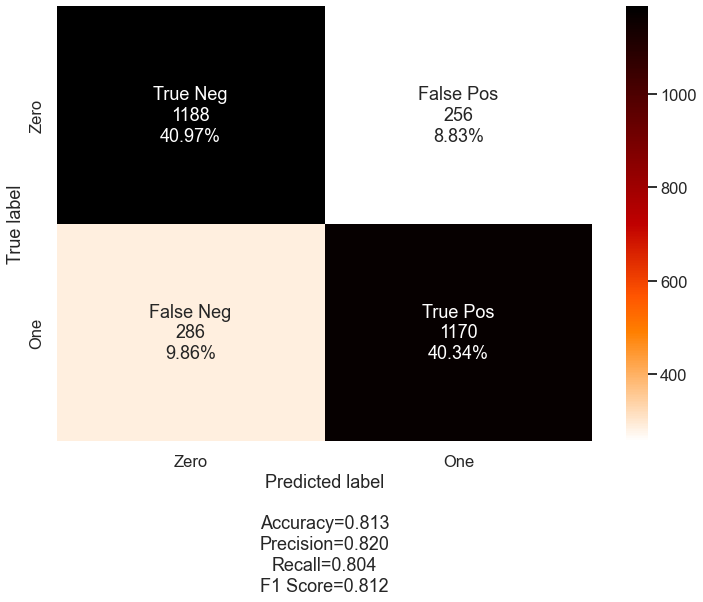

In [1087]:
cf_matrix = confusion_matrix(y_test_adasyn, grid_clf_acc.predict(X_test_adasyn))

# Print the matrix

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='gist_heat_r',
                      figsize=(12,8))
plt.show()

In [1088]:
print(classification_report(y_test_adasyn, grid_clf_acc.predict(X_test_adasyn)))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1444
           1       0.82      0.80      0.81      1456

    accuracy                           0.81      2900
   macro avg       0.81      0.81      0.81      2900
weighted avg       0.81      0.81      0.81      2900



### Stochastic Gradient Descent

In [1362]:
params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : [0.0001, 0.005, 0.001, 0.03, 0.2, 1],
    "penalty" : ["l2", "l1", "none"],
}

In [1363]:
from sklearn.metrics import make_scorer, fbeta_score, recall_score
recall_score = make_scorer(recall_score, pos_label=1)

In [1364]:
model = SGDClassifier()

In [1365]:
clf = GridSearchCV(model, param_grid=params, verbose=1, cv=20, n_jobs=-1, scoring=recall_score)
clf.fit(X_train_adasyn, y_train_adasyn)
print(classification_report(y_test_adasyn, clf.predict(X_test_adasyn)))

Fitting 20 folds for each of 72 candidates, totalling 1440 fits
              precision    recall  f1-score   support

           0       0.97      0.51      0.67      1444
           1       0.67      0.98      0.80      1456

    accuracy                           0.75      2900
   macro avg       0.82      0.74      0.73      2900
weighted avg       0.82      0.75      0.73      2900



In [1912]:
clf.best_estimator_.coef_

array([[ 0.0179917 , -0.01156914, -0.00482239, -0.05909991,  0.        ,
        -0.03557341, -0.00114745, -0.06120657, -0.02575643, -0.02446631,
        -0.06354221, -0.02615058, -0.05571503, -0.02542043, -0.05181021,
        -0.03225526, -0.00990515, -0.01177863, -0.11848755]])

In [1914]:
st = pd.DataFrame([list(clf.feature_names_in_), clf.best_estimator_.coef_.ravel()]).T
st.columns = ['Feature', 'Importance']
st = st.sort_values(by='Importance')

In [1915]:
st

,Feature,Importance
18,sugar_level_normal,-0.118488
10,Residence_type_Urban,-0.063542
7,work_type_Private,-0.061207
3,gender_Male,-0.0591
12,smoking_status_never smoked,-0.055715
14,body_type_obese,-0.05181
5,ever_married_Yes,-0.035573
15,body_type_overweight,-0.032255
11,smoking_status_formerly smoked,-0.026151
8,work_type_Self-employed,-0.025756


In [1891]:
pickle.dump(clf, open('Stochastic Gradient.p', 'wb'))

In [1892]:
stochastic_gd = pickle.load(open('Stochastic Gradient.p', 'rb'))

In [1893]:
stochastic_gd.feature_names_in_

array(['age', 'hypertension', 'heart_disease', 'gender_Male',
       'gender_Other', 'ever_married_Yes', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed',
       'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'body_type_obese', 'body_type_overweight',
       'body_type_slim', 'sugar_level_low', 'sugar_level_normal'],
      dtype=object)

In [1894]:
clf.best_params_

{'alpha': 1, 'loss': 'log', 'penalty': 'l2'}

In [1895]:
sample_model = SGDClassifier(alpha=1, loss='log', penalty='l1')

In [1896]:
sample_model.fit(X_train_adasyn, y_train_adasyn)
print(classification_report(y_test_adasyn, clf.predict(X_test_adasyn)))

              precision    recall  f1-score   support

           0       0.97      0.51      0.67      1444
           1       0.67      0.98      0.80      1456

    accuracy                           0.75      2900
   macro avg       0.82      0.74      0.73      2900
weighted avg       0.82      0.75      0.73      2900



In [1897]:
sample_model.coef_

array([[0.01885204, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ]])

In [1898]:
print(classification_report(y_test_adasyn, stochastic_gd.predict(X_test_adasyn)))

              precision    recall  f1-score   support

           0       0.97      0.51      0.67      1444
           1       0.67      0.98      0.80      1456

    accuracy                           0.75      2900
   macro avg       0.82      0.74      0.73      2900
weighted avg       0.82      0.75      0.73      2900



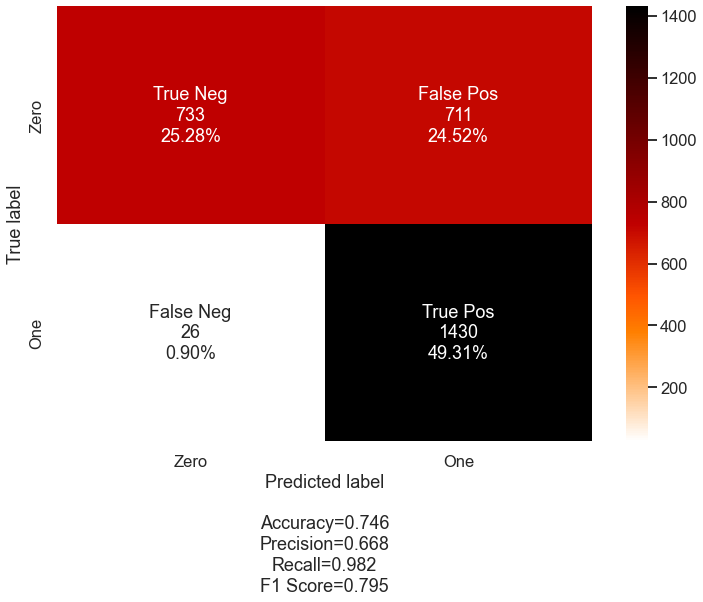

In [1899]:
cf_matrix = confusion_matrix(y_test_adasyn, stochastic_gd.predict(X_test_adasyn))

# Print the matrix

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='gist_heat_r',
                      figsize=(12,8))
plt.show()

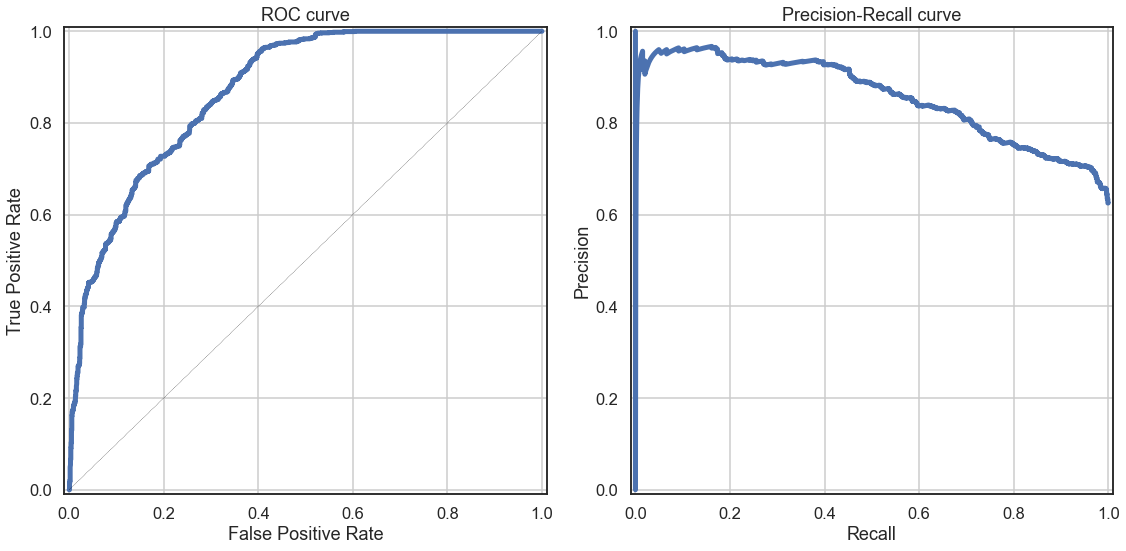

In [1900]:
sns.set_context('talk')

fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(16, 8)

# Get the probabilities for each of the two categories
y_prob = stochastic_gd.predict_proba(X_test_adasyn)

# Plot the ROC-AUC curve
ax = axList[0]

fpr, tpr, thresholds = roc_curve(y_test_adasyn, y_prob[:,1])
ax.plot(fpr, tpr, linewidth=5)
# It is customary to draw a diagonal dotted line in ROC plots.
# This is to indicate completely random prediction. Deviation from this
# dotted line towards the upper left corner signifies the power of the model.
ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='ROC curve')
ax.grid(True)

# Plot the precision-recall curve
ax = axList[1]

precision, recall, _ = precision_recall_curve(y_test_adasyn, y_prob[:,1])
ax.plot(recall, precision, linewidth=5)
ax.set(xlabel='Recall', ylabel='Precision',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Precision-Recall curve')
ax.grid(True)

plt.tight_layout()

### Ensemble Modelling

In [1429]:
from sklearn.ensemble import VotingClassifier


In [1836]:
clf1 = SGDClassifier(alpha=1, loss='log', penalty='l1')
clf2 = GaussianNB(var_smoothing=6.10876160750504e-05)
clf3 = GradientBoostingClassifier(max_depth=5, max_features=7, subsample=0.8, min_samples_split=3, min_samples_leaf=5)

In [1887]:
eclf1 = VotingClassifier(estimators=[
       ('sgd', clf1), ('nb', clf2), ('gbc', clf3)], voting='soft', weights=(0.1, 0.9, 0.1))
eclf1 = eclf1.fit(X_train_adasyn, y_train_adasyn)
y_pred = eclf1.predict(X_test_adasyn)

In [1888]:
print(classification_report(y_test_adasyn, y_pred))
print(confusion_matrix(y_test_adasyn, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.57      0.72      1444
           1       0.70      0.99      0.82      1456

    accuracy                           0.78      2900
   macro avg       0.84      0.78      0.77      2900
weighted avg       0.84      0.78      0.77      2900

[[ 822  622]
 [  21 1435]]


In [1901]:
eclf1.feature_names_in_

array(['age', 'hypertension', 'heart_disease', 'gender_Male',
       'gender_Other', 'ever_married_Yes', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed',
       'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'body_type_obese', 'body_type_overweight',
       'body_type_slim', 'sugar_level_low', 'sugar_level_normal'],
      dtype=object)

In [1905]:
eclf1.named_estimators_

{'sgd': SGDClassifier(alpha=1, loss='log', penalty='l1'),
 'nb': GaussianNB(var_smoothing=6.10876160750504e-05),
 'gbc': GradientBoostingClassifier(max_depth=5, max_features=7, min_samples_leaf=5,
                            min_samples_split=3, subsample=0.8)}

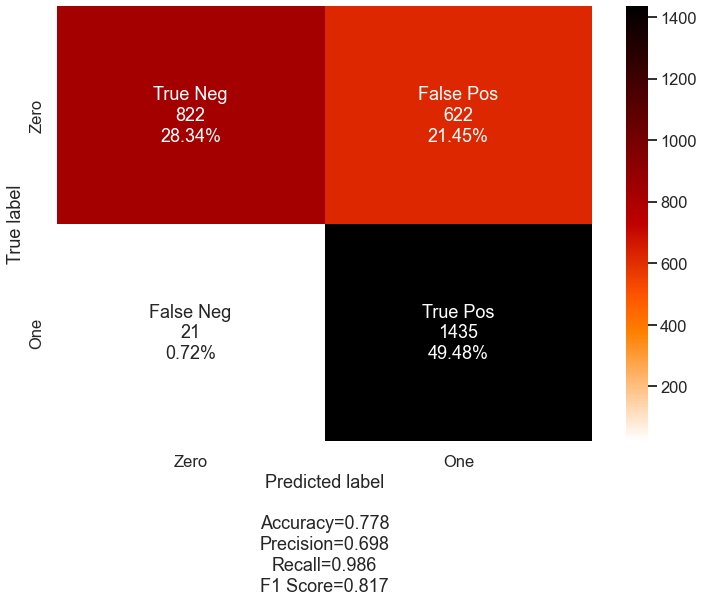

In [1889]:
cf_matrix = confusion_matrix(y_test_adasyn, y_pred)

# Print the matrix

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='gist_heat_r',
                      figsize=(12,8))
plt.show()

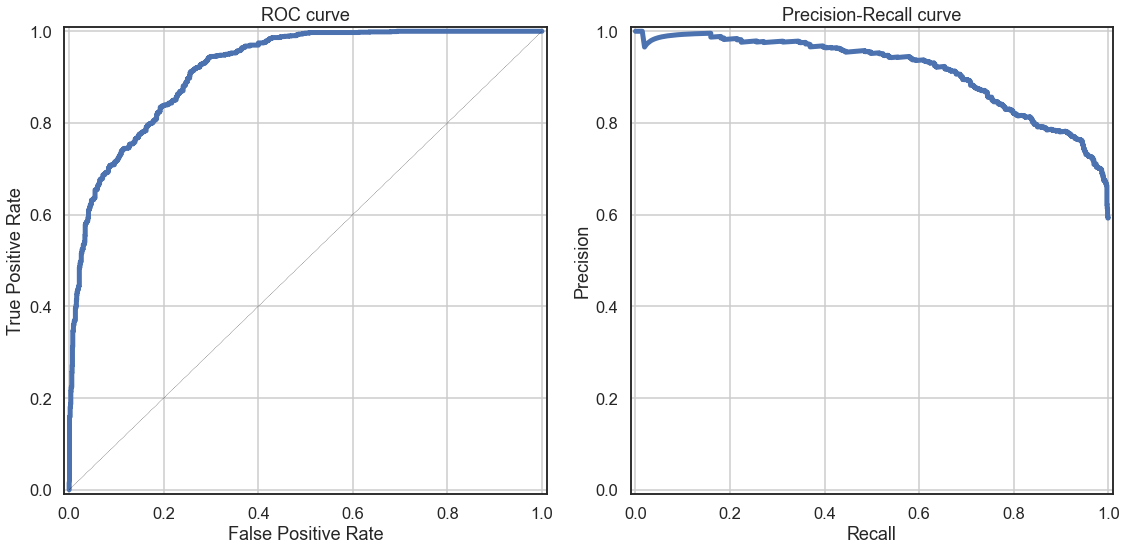

In [1890]:
sns.set_context('talk')

fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(16, 8)

# Get the probabilities for each of the two categories
y_prob = eclf1.predict_proba(X_test_adasyn)

# Plot the ROC-AUC curve
ax = axList[0]

fpr, tpr, thresholds = roc_curve(y_test_adasyn, y_prob[:,1])
ax.plot(fpr, tpr, linewidth=5)
# It is customary to draw a diagonal dotted line in ROC plots.
# This is to indicate completely random prediction. Deviation from this
# dotted line towards the upper left corner signifies the power of the model.
ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='ROC curve')
ax.grid(True)

# Plot the precision-recall curve
ax = axList[1]

precision, recall, _ = precision_recall_curve(y_test_adasyn, y_prob[:,1])
ax.plot(recall, precision, linewidth=5)
ax.set(xlabel='Recall', ylabel='Precision',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Precision-Recall curve')
ax.grid(True)

plt.tight_layout()

### Support Vector Machine

In [1158]:
from sklearn.preprocessing import MinMaxScaler

In [1211]:
from sklearn.metrics import make_scorer, fbeta_score

f2_score = make_scorer(fbeta_score, beta=2, pos_label=1)

In [1212]:
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01]}
 
grid = GridSearchCV(SVC(), param_grid, verbose = 2, scoring=f2_score)
grid.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .....................................C=0.1, gamma=1; total time=   2.6s
[CV] END .....................................C=0.1, gamma=1; total time=   2.7s
[CV] END .....................................C=0.1, gamma=1; total time=   2.5s
[CV] END .....................................C=0.1, gamma=1; total time=   2.4s
[CV] END .....................................C=0.1, gamma=1; total time=   2.5s
[CV] END ...................................C=0.1, gamma=0.1; total time=   1.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=   1.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=   1.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=   1.3s
[CV] END ...................................C=0.1, gamma=0.1; total time=   1.2s
[CV] END ..................................C=0.1, gamma=0.01; total time=   1.1s
[CV] END ..................................C=0.1,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]},
             scoring=make_scorer(fbeta_score, beta=2, pos_label=1), verbose=2)

In [1213]:
grid.best_params_

{'C': 10, 'gamma': 0.1}

In [1214]:
print(classification_report(y_test_adasyn, grid.predict(X_test_adasyn)))

              precision    recall  f1-score   support

           0       0.69      0.93      0.79      1444
           1       0.89      0.58      0.70      1456

    accuracy                           0.75      2900
   macro avg       0.79      0.76      0.75      2900
weighted avg       0.79      0.75      0.75      2900



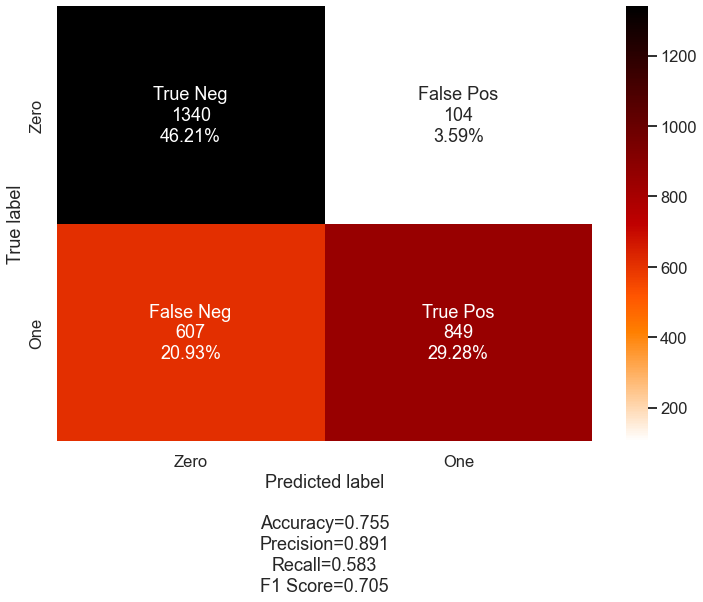

In [1215]:
cf_matrix = confusion_matrix(y_test_adasyn, grid.predict(X_test_adasyn))

# Print the matrix

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='gist_heat_r',
                      figsize=(12,8))
plt.show()

### Bagging / Random Forests

In [1248]:
param_grid = {
    'bootstrap': [True],
    'max_features': [1, 3, 9],
    'min_samples_leaf': [2,3, 5],
    'min_samples_split': [2,3,5, 7],
    'n_estimators': [200]
}

In [1250]:
model_rf = RandomForestClassifier(n_jobs=-1)
rf_clf = GridSearchCV(model_rf, param_grid=param_grid, verbose=1, cv=3, scoring=f2_score)

In [1251]:
rf_clf.fit(X_train_adasyn, y_train_adasyn)
print(classification_report(y_test_adasyn, rf_clf.predict(X_test_adasyn)))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
              precision    recall  f1-score   support

           0       0.77      0.91      0.83      1444
           1       0.89      0.73      0.80      1456

    accuracy                           0.82      2900
   macro avg       0.83      0.82      0.82      2900
weighted avg       0.83      0.82      0.82      2900



In [1252]:
rf_clf.best_params_

{'bootstrap': True,
 'max_features': 1,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 200}

In [1253]:
rf_clf.best_estimator_.feature_names_in_

array(['age', 'hypertension', 'heart_disease', 'gender_Male',
       'gender_Other', 'ever_married_Yes', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed',
       'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'body_type_obese', 'body_type_overweight',
       'body_type_slim', 'sugar_level_low', 'sugar_level_normal'],
      dtype=object)

In [1254]:
rf_clf.best_estimator_.feature_importances_

array([0.4559717 , 0.01110983, 0.00604859, 0.03897496, 0.        ,
       0.03839113, 0.00126936, 0.0323372 , 0.01854247, 0.04667224,
       0.03379951, 0.02095214, 0.04836976, 0.02599477, 0.04167982,
       0.01993378, 0.01447914, 0.01847776, 0.12699585])

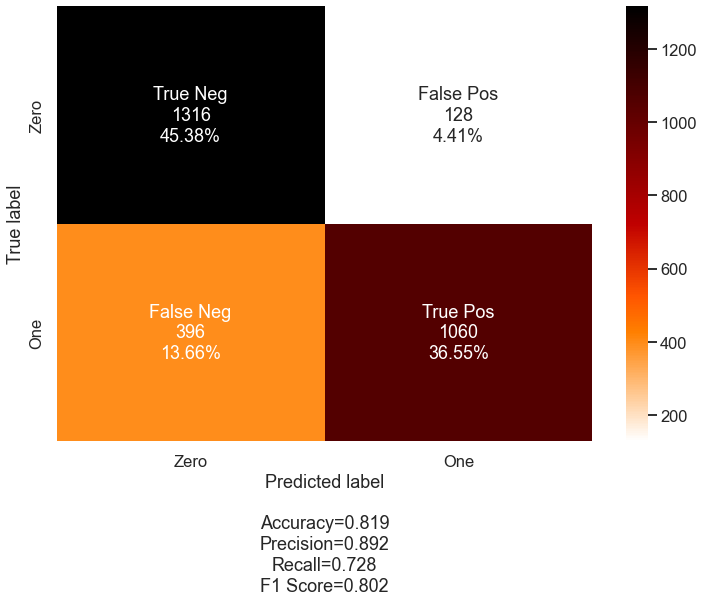

In [1255]:
cf_matrix = confusion_matrix(y_test_adasyn, rf_clf.predict(X_test_adasyn))

# Print the matrix

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='gist_heat_r',
                      figsize=(12,8))
plt.show()

In [1140]:
print(confusion_matrix(y_test_adasyn, rf_clf.predict(X_test_adasyn)))

[[1308  136]
 [ 386 1070]]


In [484]:
import pickle

### Gradient Boosting

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [1378]:
parameters = {
    "subsample":[0.8,0.6, 0.7, 0.3], 
    "max_depth": [3,5],
    "min_samples_split": [2,3, 4],
    "min_samples_leaf": [2, 3, 5],
    "max_features": [2, 4, 7]
    }

In [1379]:
from sklearn.metrics import make_scorer, fbeta_score, recall_score, precision_score

In [1380]:
model_gb = GradientBoostingClassifier()
gb_clf = GridSearchCV(model_gb, param_grid=parameters, verbose=1, cv=4, scoring=f2_score)

In [1381]:
gb_clf.fit(X_train_adasyn, y_train_adasyn)

Fitting 4 folds for each of 216 candidates, totalling 864 fits


GridSearchCV(cv=4, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 5], 'max_features': [2, 4, 7],
                         'min_samples_leaf': [2, 3, 5],
                         'min_samples_split': [2, 3, 4],
                         'subsample': [0.8, 0.6, 0.7, 0.3]},
             scoring=make_scorer(fbeta_score, beta=2, pos_label=1), verbose=1)

In [1382]:
gb_clf.best_params_

{'max_depth': 5,
 'max_features': 7,
 'min_samples_leaf': 5,
 'min_samples_split': 3,
 'subsample': 0.8}

In [1383]:
print(classification_report(y_test_adasyn, gb_clf.predict(X_test_adasyn)))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84      1444
           1       0.90      0.73      0.81      1456

    accuracy                           0.83      2900
   macro avg       0.84      0.83      0.82      2900
weighted avg       0.84      0.83      0.82      2900



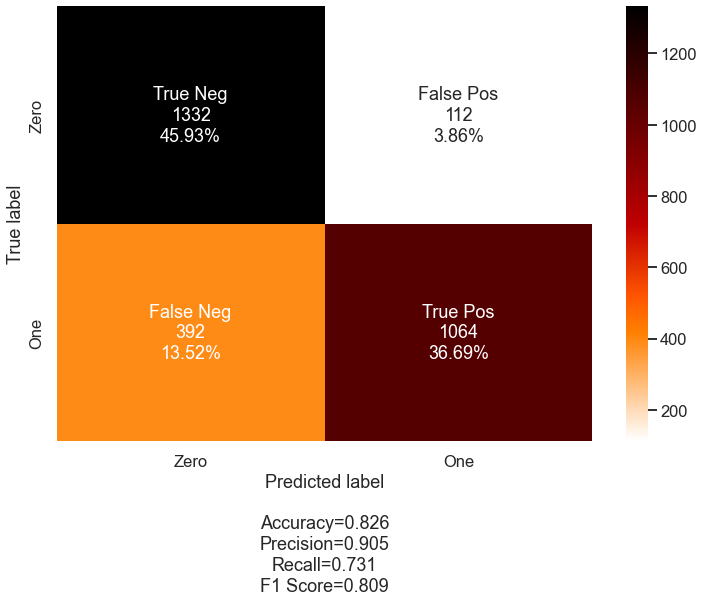

In [1384]:
cf_matrix = confusion_matrix(y_test_adasyn, gb_clf.predict(X_test_adasyn))

# Print the matrix

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='gist_heat_r',
                      figsize=(12,8))
plt.show()

### Results and saving the models

Overall the Naive Bayes performs the best in what we require (extremely low negative error for positive class) to save patients lives and not seriously misdiagnose a patient

Save the two best models for this dataset

In [1401]:
pickle.dump(gs_NB_adasyn, open('Naive Bayes Model.p', 'wb'))

In [515]:
pickle.dump(rf_clf, open('Random Forest Model.p', 'wb'))

In [506]:
pickle.dump(grid_clf_acc, open('Logistic Regression.p', 'wb'))

In [507]:
gs_NB_adasyn = pickle.load(open('Naive Bayes Model.p', 'rb'))

In [576]:
pickle.dump(clf, open('Stochastic Gradient.p', 'wb'))
stochastic_gd = pickle.load(open('Stochastic Gradient.p', 'rb'))